In [199]:
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
import math as math
import matplotlib.pyplot as plt

In [200]:
transactions = pd.read_csv("/Users/zackbrodtman/Downloads/transactions_ds.csv", delimiter = ";")
transactions["date"] = pd.to_datetime(transactions["date"], format='%Y-%m-%d %H:%M:%S')
transactions["day"] = transactions["date"].dt.dayofweek
transactions["month"] = transactions["date"].dt.month
transactions["year"] = transactions["date"].dt.year
transactions.isnull().sum()

item_id           0
quantity          0
price_ht          0
price_ttc         0
transaction_id    0
date              0
day               0
month             0
year              0
dtype: int64

<AxesSubplot:xlabel='day', ylabel='Count'>

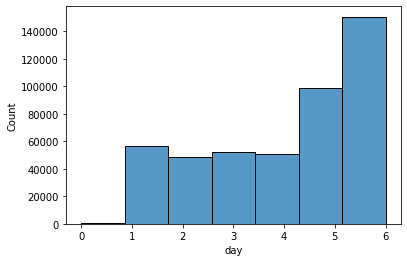

In [201]:
# friday & saturday busiest days
sns.histplot(data = transactions, x = "day", bins =7)

<AxesSubplot:xlabel='month', ylabel='Count'>

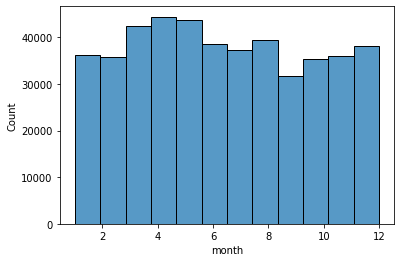

In [202]:
# Spring time busiest month
sns.histplot(transactions["month"], bins =12)

<AxesSubplot:xlabel='year', ylabel='Count'>

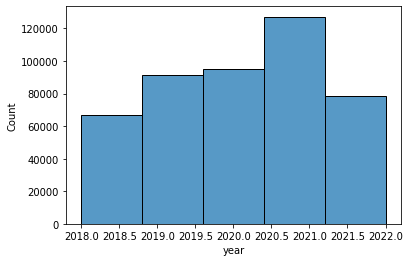

In [203]:
# covid years busier
sns.histplot(transactions["year"], bins = 5)

In [204]:
transactions.groupby('item_id').count()['quantity'].sort_values(ascending=False)[0:20]

item_id
11    60028
55    39303
26    20091
29    19894
28    18906
38    18822
76    17915
40    16147
23    13400
15    13037
36    11880
12    11393
8     11181
7      8723
47     8703
45     8432
24     8320
42     7969
18     7786
25     7648
Name: quantity, dtype: int64

<AxesSubplot:xlabel='date'>

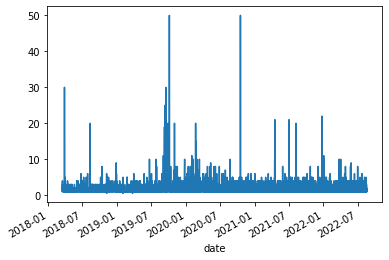

In [205]:
# seasonal product that spikes in january each year
transactions[transactions.item_id==55].set_index('date')['quantity'].plot()

<AxesSubplot:xlabel='date'>

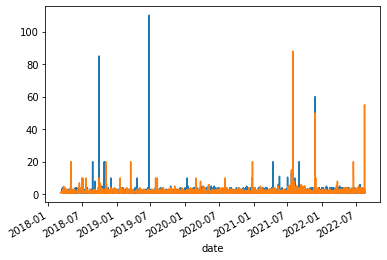

In [206]:
# weird specific orders
transactions[transactions.item_id==26].set_index('date')['quantity'].plot()
transactions[transactions.item_id==29].set_index('date')['quantity'].plot()

<AxesSubplot:xlabel='date'>

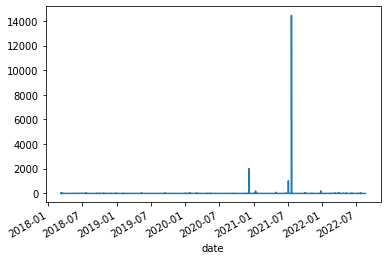

In [207]:
#weird specific order
transactions[transactions.item_id==11].set_index('date')['quantity'].plot()

(array([ 2949., 50490., 11049., 65691., 51703., 40952., 37320., 31879.,
        28067., 22748., 16582., 15714., 13275., 10935.,  9140.,  7420.,
         6292.,  5214.,  4454.,  3739.,  3121.,  2755.,  2108.,  1969.,
         1668.,  1413.,  1167.,   964.,   820.,   724.,   688.,   583.,
          513.,   411.,   420.,   265.,   292.,   232.,   315.,   146.]),
 array([ 0.  ,  0.75,  1.5 ,  2.25,  3.  ,  3.75,  4.5 ,  5.25,  6.  ,
         6.75,  7.5 ,  8.25,  9.  ,  9.75, 10.5 , 11.25, 12.  , 12.75,
        13.5 , 14.25, 15.  , 15.75, 16.5 , 17.25, 18.  , 18.75, 19.5 ,
        20.25, 21.  , 21.75, 22.5 , 23.25, 24.  , 24.75, 25.5 , 26.25,
        27.  , 27.75, 28.5 , 29.25, 30.  ]),
 <BarContainer object of 40 artists>)

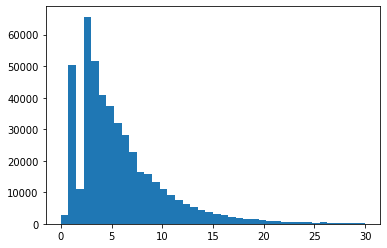

In [208]:
#cheaper items sell exponentially more
plt.hist(transactions["price_ht"], bins = 40, range = (0,30))